In [1]:
%matplotlib inline
import pandas as pd
pd.set_option("display.max_columns", None)
import numpy as np
from pylab import *
import matplotlib 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.ticker import MultipleLocator
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from sklearn.kernel_ridge import KernelRidge
from sklearn.naive_bayes import GaussianNB
from collections import OrderedDict
from sklearn import mixture
from sklearn import cluster, preprocessing, mixture 
#　データセット読み込み
df = pd.read_csv('Perovskite_Water_Splitting.csv')

In [2]:
df

,Ref,A,A1,A2,B,B1,B2,X,X1,A mole,A1 mole,A2 mole,B mole,B1 mole,B2 mole,X mole,X1 mole,Prep Meth,CalcT(K),Calc time(h),Prom Meth,Promoter,Prom %w,Crystal,BandGap(eV),Surface Area(m2/g),CatW,Alcohol%,Sac. Agent1,Sac. Agent2,Light type,Power(W),Wave length(<nm),ProdRate(μmol/gh),Label,Label2
0,[S1],Sr,non,non,Ti,non,non,O,non,0.478,NaN,NaN,0.261,NaN,NaN,0.262,NaN,flux,1373.0,10.0,impreg,Rh,0.1,cubic,3.20,0.9,1.0,0.0,NaN,NaN,Xe,300.0,300.0,540.00,SrTiO,SrTiORh
1,[S1],Sr,non,non,Ti,non,non,O,non,0.478,NaN,NaN,0.261,NaN,NaN,0.262,NaN,flux,1273.0,10.0,impreg,Rh,0.1,cubic,3.20,1.3,1.0,0.0,NaN,NaN,Xe,300.0,300.0,540.00,SrTiO,SrTiORh
2,[S1],Sr,non,non,Ti,non,non,O,non,0.478,NaN,NaN,0.261,NaN,NaN,0.262,NaN,flux,1173.0,10.0,impreg,Rh,0.1,cubic,3.20,1.9,1.0,0.0,NaN,NaN,Xe,300.0,300.0,32.00,SrTiO,SrTiORh
3,[S1],Sr,non,non,Ti,Al,non,O,non,0.477,NaN,NaN,0.261,0.0001,NaN,0.262,NaN,flux,1273.0,10.0,impreg,Rh,0.1,cubic,3.20,0.9,1.0,0.0,NaN,NaN,Xe,300.0,300.0,40.00,SrTiAlO,SrTiAlORh
4,[S1],Sr,non,non,Ti,Al,non,O,non,0.477,NaN,NaN,0.260,0.0010,NaN,0.261,NaN,flux,1273.0,10.0,impreg,Rh,0.1,cubic,3.20,2.7,1.0,0.0,NaN,NaN,Xe,300.0,300.0,380.00,SrTiAlO,SrTiAlORh
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,[S151],La,non,non,Co,non,non,O,non,0.565,NaN,NaN,0.240,NaN,NaN,0.195,NaN,SSR,1073.0,2.0,NaN,non,NaN,rhombohedral,1.42,NaN,1.0,0.0,CH2O,NaN,Xe,500.0,NaN,14.37,LaCoO,LaCoO
536,[S151],La,non,non,Co,non,non,O,non,0.565,NaN,NaN,0.240,NaN,NaN,0.195,NaN,SSR,773.0,2.0,NaN,Au,0.1,rhombohedral,1.42,NaN,1.0,0.0,CH2O,NaN,Xe,500.0,NaN,22.75,LaCoO,LaCoOAu
537,[S151],La,non,non,Co,non,non,O,non,0.565,NaN,NaN,0.240,NaN,NaN,0.195,NaN,SSR,773.0,2.0,NaN,Au,0.5,rhombohedral,1.42,NaN,1.0,0.0,CH2O,NaN,Xe,500.0,NaN,33.53,LaCoO,LaCoOAu
538,[S151],La,non,non,Co,non,non,O,non,0.565,NaN,NaN,0.240,NaN,NaN,0.195,NaN,SG,773.0,2.0,NaN,Au,1.0,rhombohedral,1.42,NaN,1.0,0.0,CH2O,NaN,Xe,500.0,NaN,28.74,LaCoO,LaCoOAu


In [8]:
X = df.loc[:,["BandGap(eV)", "ProdRate(μmol/gh)"]].fillna(method = "ffill")
y = df["Label2"].fillna(method = "ffill")

In [4]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)


In [5]:
Xnew = pd.DataFrame({"BandGap(eV)":3.1},
                    {"ProdRate(μmol/gh)":500})
ynew = gnb.predict(Xnew)
ynew

array(['SrTiRhSbOIrO2'], dtype='<U13')

In [6]:
df[df["Label2"] == 'SrTiRhSbOIrO2'].iloc[:,20:]

,Prom Meth,Promoter,Prom %w,Crystal,BandGap(eV),Surface Area(m2/g),CatW,Alcohol%,Sac. Agent1,Sac. Agent2,Light type,Power(W),Wave length(<nm),ProdRate(μmol/gh),Label,Label2
14,impreg,IrO2,3.0,cubic,2.95,NaN,1.66,0.0,H2SO4,NaN,Xe,300.0,440.0,22.00,SrTiRhSbO,SrTiRhSbOIrO2
17,impreg,IrO2,1.0,cubic,2.95,NaN,1.66,0.0,H2SO4,NaN,Xe,300.0,440.0,18.50,SrTiRhSbO,SrTiRhSbOIrO2
18,impreg,IrO2,3.0,cubic,2.95,NaN,1.66,0.0,H2SO4,NaN,Xe,300.0,300.0,60.00,SrTiRhSbO,SrTiRhSbOIrO2
19,impreg,IrO2,3.0,cubic,3.26,NaN,1.66,0.0,H2SO4,NaN,Xe,300.0,440.0,3.15,SrTiRhSbO,SrTiRhSbOIrO2
20,impreg,IrO2,3.0,cubic,3.26,NaN,1.66,0.0,H2SO4,NaN,Xe,300.0,300.0,3.65,SrTiRhSbO,SrTiRhSbOIrO2


TypeError: '(slice(None, None, None), 0)' is an invalid key

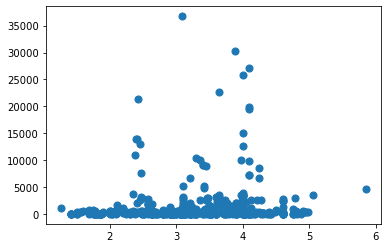

In [17]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s=50, cmap='RdBu')